<a href="https://colab.research.google.com/github/Daddycamach66/Inmersion-de-datos/blob/main/Mlb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pybaseball

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 40.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import os
import numpy as np
from pybaseball import batting_stats

In [ ]:
#START = 2002
#END = 2022

In [ ]:
#batting = batting_stats(START, END, qual=200)
#qual= means minimum plate apperances

In [ ]:
#batting.to_csv('/content/drive/MyDrive/inmersion_de_datos/batting.csv')

In [ ]:
#batting = batting.groupby('IDfg', group_keys=False).filter(lambda x: x.shape[0] > 1)

#Esta función checa que tengan al menos dos temporadas de datos

In [4]:
batting = pd.read_csv('/content/drive/MyDrive/inmersion_de_datos/batting.csv')
batting

,Unnamed: 0,IDfg,Season,Name,Team,Age,G,AB,PA,H,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,...,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,12.7
1,1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,...,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN,11.9
2,8,15640,2022,Aaron Judge,NYY,30,157,570,696,177,...,118.4,246.0,0.609,404,0.169,0.287,NaN,NaN,NaN,11.2
3,15,13611,2018,Mookie Betts,BOS,25,136,520,614,180,...,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4
4,2,1109,2003,Barry Bonds,SFG,38,130,390,550,133,...,NaN,NaN,NaN,0,0.135,0.223,NaN,NaN,NaN,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,7084,9362,2010,Adam Moore,SEA,26,60,205,218,40,...,NaN,0.0,NaN,0,0.181,0.325,NaN,NaN,NaN,-2.4
7110,7042,9272,2018,Chris Davis,BAL,32,128,470,522,79,...,111.8,113.0,0.401,282,0.174,0.316,NaN,NaN,NaN,-3.1
7111,6673,319,2011,Adam Dunn,CHW,31,122,415,496,66,...,NaN,0.0,NaN,0,0.169,0.295,NaN,NaN,NaN,-2.9
7112,6988,620,2002,Neifi Perez,KCR,29,145,554,585,131,...,NaN,NaN,NaN,0,0.130,0.187,NaN,NaN,NaN,-2.9


Creating a Machine Learning target

In [5]:
#Create a function with our target to predict
def next_season(player):
  player = player.sort_values('Season')
  player['Next_WAR'] = player['WAR'].shift(-1)
  return player

batting = batting.groupby('IDfg', group_keys=False).apply(next_season)

In [6]:
#Demostración de lo que la función shift hace
batting[['Name', 'Season', 'WAR', 'Next_WAR']]

,Name,Season,WAR,Next_WAR
3956,Alfredo Amezaga,2006,1.1,2.0
2616,Alfredo Amezaga,2007,2.0,1.2
3784,Alfredo Amezaga,2008,1.2,NaN
1034,Garret Anderson,2002,3.7,5.1
429,Garret Anderson,2003,5.1,0.8
...,...,...,...,...
6868,Spencer Torkelson,2022,-1.0,NaN
5046,Ha-seong Kim,2021,0.5,3.7
1076,Ha-seong Kim,2022,3.7,NaN
3227,Vinnie Pasquantino,2022,1.5,NaN


Cleaning the data

In [7]:
null_count = batting.isnull().sum()

In [8]:
null_count

Unnamed: 0       0
IDfg             0
Season           0
Name             0
Team             0
              ... 
xBA           7114
xSLG          7114
xwOBA         7114
L-WAR            0
Next_WAR      1539
Length: 322, dtype: int64

In [9]:
complete_cols = list(batting.columns[null_count == 0])
complete_cols

['Unnamed: 0',
 'IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Pitches',
 'Balls',
 'Strikes',
 'IFH',
 'BU',
 'BUH',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Dol',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'FB% (Pitch)',
 'FBv',
 'SL%',
 'SLv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'wFB',
 'wSL',
 'wCB',
 'wCH',
 'wFB/C',
 'wSL/C',
 'wCB/C',
 'wCH/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'BsR',
 'Def',
 'wSB',
 'UBR',
 'Age Rng',
 'Off',
 'Lg',
 'wGDP',
 'Pull%',
 'Cent%',
 'Oppo%',
 'Soft%',
 'Med%',
 'Hard%',
 'TTO%',
 'AVG+

In [10]:
batting = batting[complete_cols + ['Next_WAR']].copy()
batting

,Unnamed: 0,IDfg,Season,Name,Team,Age,G,AB,PA,H,...,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,L-WAR,Next_WAR
3956,5562,1,2006,Alfredo Amezaga,FLA,28,132,334,378,87,...,107,113,143,109,63,0,0.188,0.256,1.1,2.0
2616,5006,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,...,101,112,109,113,75,0,0.175,0.227,2.0,1.2
3784,5252,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,...,101,101,123,111,64,0,0.178,0.244,1.2,NaN
1034,1169,2,2002,Garret Anderson,ANA,30,158,638,678,195,...,91,80,65,97,129,0,0.137,0.232,3.7,5.1
429,864,2,2003,Garret Anderson,ANA,31,159,638,673,201,...,101,80,90,99,109,0,0.164,0.252,5.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6868,6552,27465,2022,Spencer Torkelson,DET,22,110,360,404,73,...,91,104,85,102,105,263,0.170,0.275,-0.9,NaN
5046,6620,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,...,99,59,137,96,88,201,0.216,0.303,0.6,3.7
1076,4396,27506,2022,Ha-seong Kim,SDP,26,150,517,582,130,...,104,71,117,100,90,424,0.205,0.276,4.0,NaN
3227,1107,27676,2022,Vinnie Pasquantino,KCR,24,72,258,298,76,...,104,87,79,93,123,226,0.162,0.228,1.5,NaN


In [11]:
#check for integers or strings
batting.dtypes

Unnamed: 0      int64
IDfg            int64
Season          int64
Name           object
Team           object
               ...   
Events          int64
CStr%         float64
CSW%          float64
L-WAR         float64
Next_WAR      float64
Length: 134, dtype: object

In [12]:
batting.dtypes[batting.dtypes == 'object']

Name       object
Team       object
Dol        object
Age Rng    object
dtype: object

In [13]:
batting['Dol']

3956      $5.5
2616     $11.2
3784      $7.2
1034     $14.6
429      $22.0
         ...  
6868    ($7.8)
5046      $3.9
1076     $29.3
3227     $11.9
2458     $16.7
Name: Dol, Length: 7114, dtype: object

In [14]:
del batting['Dol']

In [15]:
batting['Age Rng']

3956    28 - 28
2616    29 - 29
3784    30 - 30
1034    30 - 30
429     31 - 31
         ...   
6868    22 - 22
5046    25 - 25
1076    26 - 26
3227    24 - 24
2458    27 - 27
Name: Age Rng, Length: 7114, dtype: object

In [16]:
del batting['Age Rng']

In [17]:
#Cambiar el nombre del equipo a un número que el modelo de ML pueda procesar.
batting['team_code'] = batting['Team'].astype('category').cat.codes

In [18]:
batting_full = batting.copy()
batting = batting.dropna().copy()

SELECTING USEFUL FEATURES

In [19]:
#NO vamos a usar todas las 134 columnas
#Vamos a crear el modelo
#Vamos a correr u feature selector que nos ayude a escoger el subset de feautres que mas ayuden a entrenar el modelo

from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

#Entre más alto sea menos overfedea el modelo
rr = Ridge(alpha=1)

#Divide los datos en 3 y hacer predicciones (en time series)
#Esto  lo hacemos para que las predicciones no se hagan con datos del futuro
split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, n_features_to_select=20, direction='forward', cv=split, n_jobs=4)

In [20]:
removed_columns = ['Next_WAR', 'Name', 'Team', 'IDfg', 'Season']
selected_columns = batting.columns[~batting.columns.isin(removed_columns)]

In [21]:
#We need to scale our data to make the mean 0 ande std 1

from sklearn.preprocessing import MinMaxScaler

#El minmaxscaler lo que hace es poner todos los datos entre 0 y 1
scaler = MinMaxScaler()
batting.loc[:, selected_columns] = scaler.fit_transform(batting[selected_columns])

In [22]:
batting.describe()

#Se ve muy diferente los datos

,Unnamed: 0,IDfg,Season,Age,G,AB,PA,H,1B,2B,...,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,L-WAR,Next_WAR,team_code
count,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,...,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000
mean,0.451542,5366.785830,2011.163229,0.360600,0.652755,0.478666,0.480943,0.365973,0.290481,0.399279,...,0.403164,0.410923,0.511026,0.478646,0.172991,0.498932,0.545898,0.334663,1.794493,0.474128
std,0.279450,5133.255295,5.612014,0.147476,0.255929,0.242481,0.262290,0.182585,0.138786,0.171732,...,0.131213,0.121082,0.130359,0.133992,0.273858,0.137180,0.120701,0.120013,1.997375,0.305105
min,0.000000,1.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,0.000000
25%,0.209265,1131.500000,2006.000000,0.269231,0.478632,0.275180,0.257785,0.211207,0.179245,0.258621,...,0.315789,0.331461,0.420290,0.387755,0.000000,0.408511,0.466960,0.248447,0.300000,0.205882
50%,0.431885,3531.000000,2011.000000,0.346154,0.709402,0.505396,0.508651,0.370690,0.283019,0.379310,...,0.398496,0.404494,0.507246,0.489796,0.000000,0.493617,0.546256,0.316770,1.500000,0.470588
75%,0.681358,9015.000000,2016.000000,0.461538,0.871795,0.688849,0.710208,0.508621,0.391509,0.517241,...,0.488722,0.483146,0.594203,0.564626,0.346411,0.591489,0.625551,0.403727,2.900000,0.735294
max,1.000000,27506.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.900000,1.000000


In [23]:
#Get ready to actually fit our feature selector.

sfs.fit(batting[selected_columns], batting['Next_WAR'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=20,
                          n_jobs=4)

In [25]:
sfs.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True, False]

In [26]:
predictors = list(selected_columns[sfs.get_support()])

Making predictions with ML

In [27]:
#Haremos una función que hará las predicciones por nosotros, al ser una serie de tiempo tenemos que hacerlo hacia atrás

def backtest(data, model, predictors, start=5, step=1):
  all_predictions = []

  years = sorted(data['Season'].unique())

  for i in range(start, len(years), step):
    current_year = years[i]

    train = data[data['Season'] < current_year]
    test = data[data['Season'] == current_year]

    model.fit(train[predictors], train['Next_WAR'])

    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index)
    combined = pd.concat([test['Next_WAR'], preds], axis=1)
    combined.columns = ['actual', 'prediction']

    all_predictions.append(combined)
  return pd.concat(all_predictions) 

In [28]:
predictions = backtest(batting, rr, predictors)

In [29]:
predictions

,actual,prediction
2616,1.2,1.545032
3390,1.4,0.724964
4567,-0.1,0.433088
4663,0.6,0.995956
1748,4.8,2.176915
...,...,...
2069,2.4,2.720111
4641,0.9,2.003221
6881,0.6,1.529584
6216,-0.5,1.951031


In [30]:
#Create summary estatistic to create an error metric

from sklearn.metrics import mean_squared_error

mean_squared_error(predictions['actual'], predictions['prediction'])

2.800276240254884

In [31]:
batting['Next_WAR'].describe()

count    5575.000000
mean        1.794493
std         1.997375
min        -3.400000
25%         0.300000
50%         1.500000
75%         2.900000
max        11.900000
Name: Next_WAR, dtype: float64

**Una forma de ver que el modelo sea bueno es que  la raíz cuadrada del promedio de los errores al cuadrado, sea menor que la desviación estandar**




In [32]:
2.800276240254884 ** .5

1.6734025935963182

Esta muy cerca de la std, no es genial pero esta bien. Puede mejorar.


**IMPROVING ACCURACY**

In [34]:
#Vamos a darle al algoritmo info de las pasadas temporadas de cad jugador, por ahora solo tiene la de esta temporada

def player_history(df):
  df = df.sort_values('Season')

  df['player_season'] = range(0, df.shape[0])
  df['war_corr'] = list(df[['player_season', 'WAR']].expanding().corr().loc[(slice(None), 'player_season'), 'WAR'])
  df['war_corr'].fillna(1, inplace=True)

  df['war_diff'] = df['WAR'] / df['WAR'].shift(1)
  df['war_diff'].fillna(1, inplace=True)

  df['war_diff'][df['war_diff'] == np.inf] = 1

  return df

batting = batting.groupby('IDfg', group_keys=False).apply(player_history)


In [35]:
def group_avgs(df):
  return df['WAR'] /df['WAR'].mean()

In [36]:
batting['war_season'] = batting.groupby('Season', group_keys=False).apply(group_avgs)

In [37]:
new_predictors = predictors + ['player_season', 'war_corr', 'war_diff', 'war_season']


In [38]:
predictions = backtest(batting, rr, new_predictors)

In [39]:
mean_squared_error(predictions['actual'], predictions['prediction'])

2.7119010940408392

In [40]:
2.7119010940408392 ** 0.5

1.6467850782785345

**Diagnosing issues with the model**

In [42]:
#How much each predictor impact the model

pd.Series(rr.coef_, index=new_predictors).sort_values()

Age             -2.654322
BABIP           -1.834334
WAR             -1.674973
Soft%+          -1.297989
SLG+            -1.060683
BU              -0.913625
SO              -0.756929
PH              -0.721430
war_diff        -0.583429
wGDP            -0.470109
CB%             -0.319112
Pull%+          -0.210428
war_corr        -0.122737
player_season   -0.004176
Unnamed: 0       0.261070
IFH%             0.375503
L-WAR            0.461394
Oppo%            0.699905
Spd              0.747000
OBP+             0.893445
SB               1.062856
IBB              1.414722
Hard%+           2.281935
war_season       3.283263
dtype: float64

In [44]:
diff = predictions['actual'] - predictions['prediction']
diff

2616   -0.312539
3390    0.912648
4567   -0.418464
4663   -0.403839
1748    2.799027
          ...   
2069   -0.251744
4641   -0.887846
6881   -0.637365
6216   -2.033961
5046    2.695214
Length: 4127, dtype: float64

In [45]:
merged = predictions.merge(batting, left_index=True, right_index=True)


In [46]:
merged['diff'] = (predictions['actual'] - predictions['prediction']).abs()

In [47]:
merged

,actual,prediction,Unnamed: 0,IDfg,Season,Name,Team,Age,G,AB,...,CStr%,CSW%,L-WAR,Next_WAR,team_code,player_season,war_corr,war_diff,war_season,diff
2616,1.2,1.512539,0.703782,1,2007,Alfredo Amezaga,FLA,0.384615,0.743590,0.431655,...,0.527660,0.396476,0.335404,1.2,0.352941,1,1.000000,1.200000,0.998355,0.312539
3390,1.4,0.487352,0.270631,2,2007,Garret Anderson,LAA,0.615385,0.529915,0.462230,...,0.442553,0.480176,0.298137,1.4,0.441176,5,-0.692192,1.371429,0.887427,0.912648
4567,-0.1,0.318464,0.436103,10,2007,David Eckstein,STL,0.500000,0.606838,0.492806,...,0.676596,0.436123,0.254658,-0.1,0.852941,5,-0.694330,0.836735,0.758010,0.418464
4663,0.6,1.003839,0.814987,11,2007,Darin Erstad,CHW,0.538462,0.350427,0.269784,...,0.765957,0.691630,0.254658,0.6,0.205882,4,-0.828562,0.803922,0.758010,0.403839
1748,4.8,2.000973,0.155912,15,2007,Troy Glaus,TOR,0.423077,0.589744,0.404676,...,0.634043,0.704846,0.378882,4.8,0.970588,5,0.231396,0.897059,1.127772,2.799027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2.4,2.651744,0.269085,23667,2021,Wander Franco,TBR,0.038462,0.205128,0.217626,...,0.391489,0.352423,0.366460,2.4,0.911765,0,1.000000,1.000000,1.059741,0.251744
4641,0.9,1.787846,0.825952,24618,2021,Ryan Jeffers,MIN,0.192308,0.333333,0.192446,...,0.514894,0.788546,0.254658,0.9,0.558824,0,1.000000,1.000000,0.749127,0.887846
6881,0.6,1.237365,0.988612,24655,2021,Owen Miller,CLE,0.192308,0.119658,0.055755,...,0.548936,0.700441,0.142857,0.6,0.264706,0,1.000000,1.000000,0.438514,0.637365
6216,-0.5,1.533961,0.686208,26197,2021,Andrew Vaughn,CHW,0.153846,0.692308,0.462230,...,0.570213,0.651982,0.223602,-0.5,0.205882,0,1.000000,1.000000,0.566413,2.033961


In [48]:
merged[['IDfg', 'Season', 'Name', 'WAR', 'Next_WAR', 'diff']].sort_values(['diff'])

,IDfg,Season,Name,WAR,Next_WAR,diff
1918,639,2017,Adrian Beltre,0.366460,1.1,0.000436
3594,8202,2015,Josh Harrison,0.291925,1.6,0.001861
850,1873,2013,Matt Holliday,0.459627,3.2,0.004767
3000,2829,2017,Manny Pina,0.316770,1.2,0.005165
2371,9345,2014,Brock Holt,0.347826,2.0,0.005870
...,...,...,...,...,...,...
5727,5631,2010,Matt Kemp,0.211180,8.3,6.411676
3262,4810,2007,Brian McCann,0.304348,8.6,6.423030
853,9166,2010,Buster Posey,0.459627,10.1,6.720630
3129,11579,2014,Bryce Harper,0.310559,9.3,7.423459


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
merged_sorted = merged[['IDfg', 'actual', 'prediction', 'diff']].sort_values(['diff'])

<Axes: >

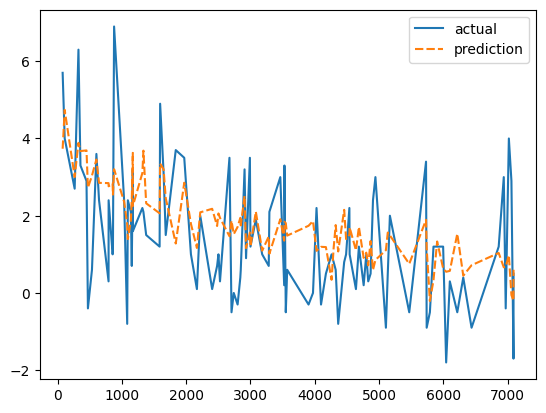

In [56]:
sns.lineplot(data=merged_sorted[['actual', 'prediction']].sample(100))